# K-Nearest Neighbor (K-NN) Classifier

A simple classification algorithm which classifies data points based on distances to nearest neighboring points (usually Euclidean distance).

In [8]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load and preprocess dataset

In [2]:
# import data
df = pd.read_csv('datasets/social_network.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
# separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# print first 5 rows of features
print(f'First 5 rows of features: {X[:5]}')

# print first 5 rows of labels
print(f'First 5 rows of labels: {y[:5]}')

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


First 5 rows of features: [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
First 5 rows of labels: [0 0 0 0 0]


### Model Training

#### Train with predetermined number of neighbors (5 neighbors)

In [7]:
# train KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

# predict test set results
y_pred = knn.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.89      0.92      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

[[59  4]
 [ 3 34]]


#### Use cross-validation to find the optimal number of neighbors

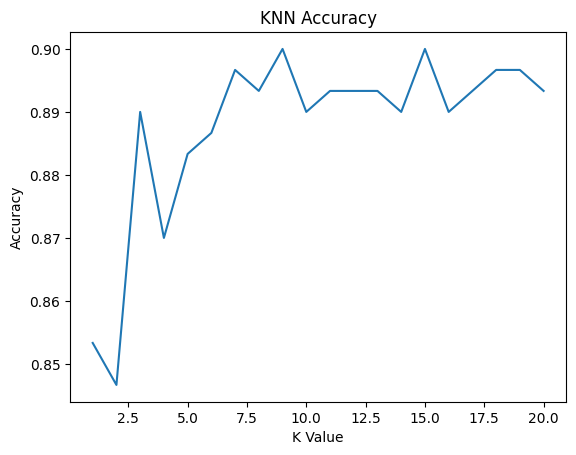

Best k value: 9


In [9]:
accuracies = []

# find best k value
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    accuracies.append(scores.mean())

# plot accuracies
plt.plot(range(1, 21), accuracies)
plt.title('KNN Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

# print k value with highest accuracy
print(f'Best k value: {accuracies.index(max(accuracies)) + 1}')


In [10]:
# train KNN model with best k value
knn = KNeighborsClassifier(n_neighbors=accuracies.index(max(accuracies)) + 1)
knn.fit(X_train, y_train)

# predict test set results
y_pred = knn.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100

[[58  5]
 [ 1 36]]


#### Use grid search to find the optimal number of neighbors

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}
Best score: 0.9
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 1 2 3 4 5 6 7 8 9 10
 11 12 13 14 15 16 17 18 19 20]
[0.85333333 0.84666667 0.89       0.87       0.88333333 0.88666667
 0.89666667 0.89333333 0.9        0.89       0.89333333 0.89333333
 0.89333333 0.89       0.9        0.89       0.89333333 0.89666667
 0.89666667 0.89333333 0.85333333 0.84       0.88333333 0.87666667
 0.88666667 0.87666667 0.9        0.89333333 0.89333333 0.89
 0.89666667 0.89666667 0.89666667 0.89       0.89333333 0.88666667
 0.89333333 0.9        0.89666667 0.89333333]


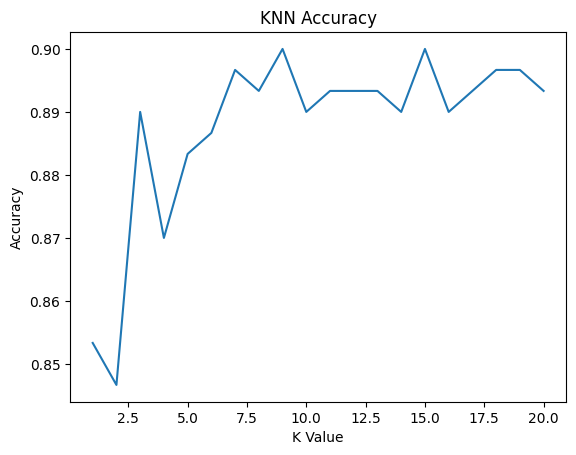

In [16]:
# create param grid
param_grid = {'n_neighbors': np.arange(1, 21), 'metric': ['euclidean', 'manhattan']}

# create grid search object
knn_cv = GridSearchCV(knn, param_grid, cv=10)

# fit grid search object to training data
knn_cv.fit(X_train, y_train)

# print best parameters
print(f'Best parameters: {knn_cv.best_params_}')

# print best score
print(f'Best score: {knn_cv.best_score_}')

print(knn_cv.cv_results_['param_n_neighbors'])
print(knn_cv.cv_results_['mean_test_score'])

# visualize n_neighbors vs accuracy
plt.plot(knn_cv.cv_results_['param_n_neighbors'][0:20], knn_cv.cv_results_['mean_test_score'][0:20])
plt.title('KNN Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()
